In [47]:
import os
import pandas as pd
from enum import Enum
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

INSTANCES = 4
MIN_SIZE = 8
SIZES = 5

class Symmetry(Enum):
    SYMMETRIC = "Symetryczne"
    ASYMMETRIC = "Asymetryczne"

class Sizes(Enum):
    S99 = "99"
    S152 = "152"
    S225 = "225"
    S264 = "264"
    A33 = "33"
    A64 = "64"
    A100 = "100"
    A170 = "170"
    

In [48]:
#Find all files in dir_path directory
dir_path = "../build/Wyniki"

file_list = os.listdir(dir_path)
print(file_list)

['AnAlpha.csv', 'AnEpoch.csv', 'AnNeigMet.csv', 'AnStart.csv', 'AnStartVal.csv', 'AoAB.csv', 'AoFeroMet.csv', 'AoRho.csv', 'fAnFinal.csv', 'fAoFinal.csv', 'fTsFinal.csv', 'test.csv', 'TsCount.csv', 'TsNeighMet.csv', 'TsStartVal.csv', 'TsTabuLen.csv']


In [49]:
#Read data from all .csv
data_frames = {}
file_list = [file_name for file_name in file_list if file_name.startswith("An")]
for file_name in file_list:
    file_path = "../build/Wyniki/"+file_name
    data_frame = pd.read_csv(file_path)
    data_frame["Blad wzgledny (procentowo)"] = data_frame["Blad wzgledny (procentowo)"].astype(str) .str.rstrip('%').astype(float) 
    data_frame = data_frame[pd.to_numeric(data_frame.iloc[:, 0], errors='coerce').notna()]
    data_frames[file_name] = data_frame
    


In [50]:
#Genrate base table and column list
columns = pd.MultiIndex.from_tuples(
    [
        ("","Rozmiar[Liczba wierzchołków]"),
        (Symmetry.SYMMETRIC.value, Sizes.S99.value),
        (Symmetry.SYMMETRIC.value, Sizes.S152.value),
        (Symmetry.SYMMETRIC.value, Sizes.S225.value),
        (Symmetry.SYMMETRIC.value, Sizes.S264.value),
        (Symmetry.ASYMMETRIC.value, Sizes.A33.value),
        (Symmetry.ASYMMETRIC.value, Sizes.A64.value),
        (Symmetry.ASYMMETRIC.value, Sizes.A100.value),
        (Symmetry.ASYMMETRIC.value, Sizes.A170.value)
    ],
    )
base_table = pd.DataFrame(columns=columns)
column_list = [
    (Symmetry.SYMMETRIC.value, Sizes.S99.value),
    (Symmetry.SYMMETRIC.value, Sizes.S152.value),
    (Symmetry.SYMMETRIC.value, Sizes.S225.value),
    (Symmetry.SYMMETRIC.value, Sizes.S264.value),
    (Symmetry.ASYMMETRIC.value, Sizes.A33.value),
    (Symmetry.ASYMMETRIC.value, Sizes.A64.value),
    (Symmetry.ASYMMETRIC.value, Sizes.A100.value),
    (Symmetry.ASYMMETRIC.value, Sizes.A170.value)
]
print(base_table.columns)

MultiIndex([(            '', 'Rozmiar[Liczba wierzchołków]'),
            ( 'Symetryczne',                           '99'),
            ( 'Symetryczne',                          '152'),
            ( 'Symetryczne',                          '225'),
            ( 'Symetryczne',                          '264'),
            ('Asymetryczne',                           '33'),
            ('Asymetryczne',                           '64'),
            ('Asymetryczne',                          '100'),
            ('Asymetryczne',                          '170')],
           )


In [51]:
def save_to_latex(saved_table,file_name,caption,label):
    f = open("./src/tables/"+file_name, "w",encoding="utf-8")
    latex_output = saved_table.to_latex(  index=False,
                                    column_format="|r|r|r|r|r|r|r|r|r|",
                                    caption=caption,
                                    label="tab:"+label,
                                    multicolumn_format="|c|",
                                    float_format="%.2f")
    latex_output = latex_output.replace("\begin{table}", r"\begin{table}[ht]")
    latex_output = latex_output.replace("{Asymetryczne} \\",r"{Asymetryczne} \\ \hline")
    latex_output = latex_output.replace("\\toprule", r"\hline")
    latex_output = latex_output.replace("\n\\midrule", r" \hline")
    latex_output = latex_output.replace("\n\\bottomrule", r" \hline")
    latex_output = latex_output.replace("Rozmiar Instancji/\n","Rozmiar Instancji/\\linebreak")
    latex_output = latex_output.replace("\\begin{tabular}{|r|r|r|r|r|r|r|r|}\n","\\centering\n\\begin{tabular}{|r|r|r|r|r|r|r|r|}\n")
    latex_output = latex_output.replace("\\caption{"+caption+"}\n","")
    latex_output = latex_output.replace("\\label{tab:"+label+"}\n","")
    latex_output = latex_output.replace("\\end{tabular}","\\end{tabular}\n\\caption{"+caption+"}\n"+"\\label{tab:"+label+"}")
    latex_output = latex_output.replace("%", r"\%")
    f.write(latex_output)
    f.close()

In [52]:
def createPlot(data_frame,file_name,labels):
    file_name = file_name.replace(".csv", "")
    tsp_index_table = [99,152,225,264]
    atsp_index_table = [33,64,100,170]
    num_rows = len(data_frame)
    colors = ['blue', 'green', 'orange', 'purple', 'cyan'][:num_rows] 
    tsp_labels = labels
    plt.figure(figsize=(10, 6))
    for i in range(1,5):
        tsp_data = data_frame.iloc[:,i].values.flatten()
        plt.plot(tsp_labels,tsp_data,label= tsp_index_table[i-1], marker='o',color = colors[i])
    plt.ylabel("Blad wzgledny [%]")
    plt.ylim(bottom=0)
    plt.xlabel("Rozmiar instancji [Liczba wierzchołków]")
    plt.xticks(tsp_labels)
    plt.legend()
    plt.grid(True)
    plt.savefig("./src/plots/"+"sym"+file_name+".png")
    plt.show()

    plt.figure(figsize=(10, 6))
    for i in range(1,5):
        atsp_data = data_frame.iloc[:,i+4].values.flatten()
        plt.plot(tsp_labels,atsp_data, label= atsp_index_table[i-1], marker='o',color = colors[i])
    plt.ylabel("Blad wzgledny [%]")
    plt.ylim(bottom=0)
    plt.xlabel("Rozmiar instancji [Liczba wierzchołków]")
    plt.xticks(tsp_labels)
    plt.legend()
    plt.grid(True)
    plt.savefig("./src/plots/"+"asym"+file_name+".png")
    plt.show()

In [53]:
def createPlot2(data_frame,file_name,labels):
    file_name = file_name.replace(".csv", "")
    tsp_index_table = [99,152,225,264]
    atsp_index_table = [33,64,100,170]
    tsp_labels = labels
    plt.figure(figsize=(10, 6))
    for i in range(1,5):
        tsp_data = data_frame.iloc[:1,i].values.flatten()
        atsp_data = data_frame.iloc[1:,i].values.flatten()
        plt.plot(tsp_index_table[i-1],tsp_data , marker='o',color = 'blue')
        plt.plot(tsp_index_table[i-1],atsp_data, marker='o',color = 'green')
    plt.ylabel("Blad wzgledny [%]")
    plt.ylim(bottom=0)
    plt.xlabel("Rozmiar instancji [Liczba wierzchołków]")
    plt.xticks(tsp_index_table)
    plt.legend()
    plt.grid(True)
    plt.savefig("./src/plots/"+"sym"+file_name+".png")
    plt.show()

    plt.figure(figsize=(10, 6))
    for i in range(1,5):
        tsp_data = data_frame.iloc[:1,i+4].values.flatten()
        atsp_data = data_frame.iloc[1:,i+4].values.flatten()
        print(tsp_data)
        print(atsp_data)
        plt.plot(atsp_index_table[i-1],tsp_data, marker='o',color = 'blue')
        plt.plot(atsp_index_table[i-1],atsp_data, marker='o',color = 'green')
    plt.ylabel("Blad wzgledny [%]")
    plt.ylim(bottom=0)
    plt.xlabel("Rozmiar instancji [Liczba wierzchołków]")
    plt.xticks(atsp_index_table)
    plt.legend()
    plt.grid(True)
    plt.savefig("./src/plots/"+"asym"+file_name+".png")
    plt.show()

AnAlpha.csv
                             Symetryczne                      Asymetryczne                     
Rozmiar[Liczba wierzchołków]          99    152    225    264           33     64    100    170
                         NaN      0.0008 0.0011 0.0016 0.0018       0.0004 0.0006 0.0008 0.0012
                         NaN      0.0010 0.0014 0.0020 0.0024       0.0005 0.0008 0.0010 0.0016
                         NaN      0.0014 0.0020 0.0029 0.0033       0.0007 0.0011 0.0015 0.0022
                         NaN      0.0024 0.0034 0.0049 0.0056       0.0012 0.0018 0.0024 0.0038
                         NaN      0.0074 0.0104 0.0146 0.0168       0.0037 0.0054 0.0074 0.0115


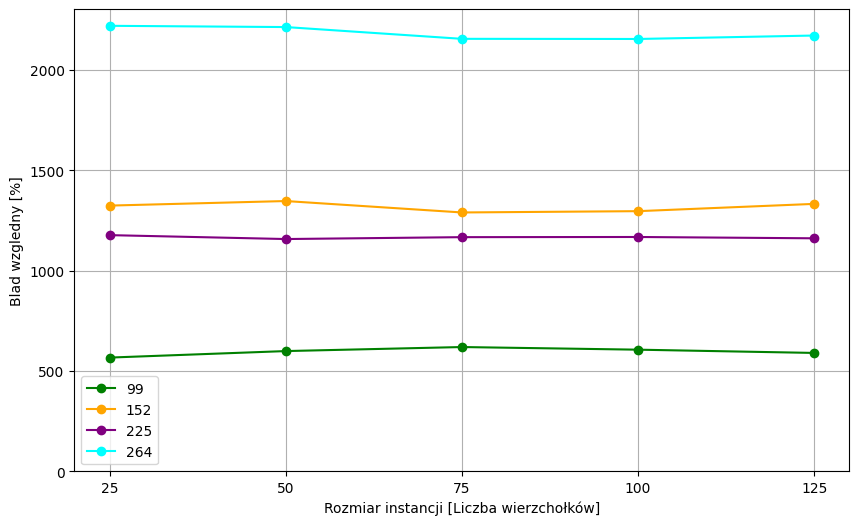

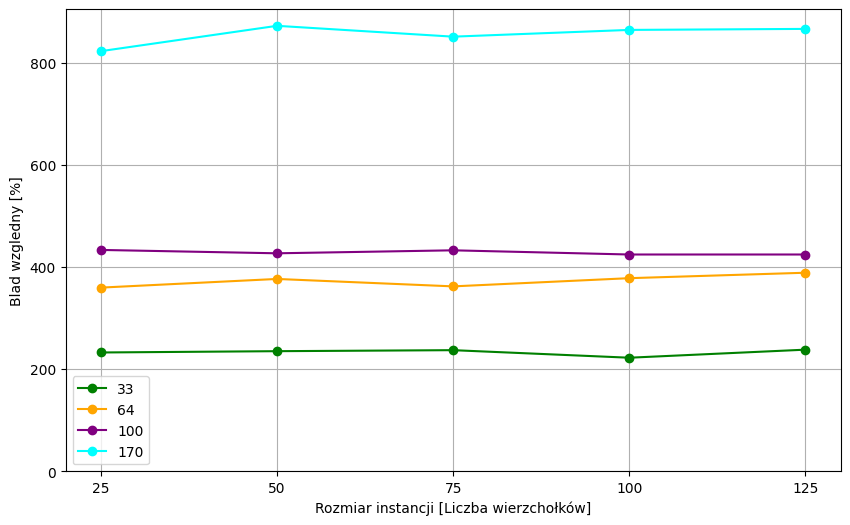

AnEpoch.csv
                             Symetryczne                      Asymetryczne                     
Rozmiar[Liczba wierzchołków]          99    152    225    264           33     64    100    170
                         NaN      0.0150 0.0210 0.0310 0.0393       0.0078 0.0117 0.0159 0.0247
                         NaN      0.0318 0.0450 0.0631 0.0733       0.0157 0.0232 0.0323 0.0495
                         NaN      0.0482 0.0678 0.0946 0.1186       0.0235 0.0347 0.0483 0.0767
                         NaN      0.0635 0.0898 0.1266 0.1459       0.0314 0.0463 0.0641 0.0985
                         NaN      0.0796 0.1125 0.1585 0.1980       0.0392 0.0579 0.0799 0.1188


ValueError: x and y must have same first dimension, but have shapes (2,) and (5,)

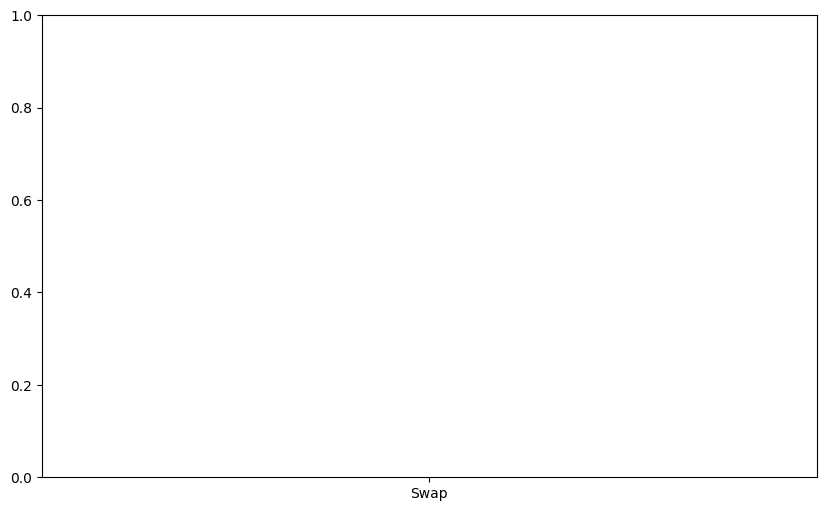

In [59]:
#Create Mean execute time tables
time_frames = {}
files = 0
table1 = [25,50,75,100,125]
table2 = ["Swap","Insert"]
table3 = ["NN","Random"]
table4 = [0.5,0.4,0.3,0.2,0.1]
for file_name in file_list:
    data_frame = data_frames[file_name]
    file_name_no_ext = file_name.replace(".csv", "")
    with open(f"./src/tables/{file_name_no_ext}.tex", 'w') as file:
        pass
    err_table = base_table.copy()
    time_table = base_table.copy()
    j = 0
    i = 0
    if(files == 0): label = table1
    if(files == 1): label = table2
    if(files == 2): label = table3
    if(files == 3): label = table4
    files +=1
    for k in range(0,len(label)):
        err_table.at[k,("","Rozmiar[Liczba wierzchołków]")] = label[k]
    for start in range(0, len(data_frame), INSTANCES):
        end = start + INSTANCES
        selected_data = data_frame.iloc[start:end]
        average_error = selected_data["Blad wzgledny (procentowo)"].mean()
        average_time  = selected_data["Czas wykonania"].mean()
        err_table.at[i, column_list[j]] = round(average_error, 2)
        time_table.at[i, column_list[j]] = round(average_time, 4)
        j += 1
        if j>7:
            j = 0
            i += 1
    pd.options.display.float_format = '{:.4f}'.format
    print(file_name)
    print(time_table.to_string(index=False))
    save_to_latex(err_table,file_name_no_ext+".tex","Błędy w wynikach algorytmu dla macierzy symetrycznych i niesymetrycznych","error_"+file_name_no_ext)
    if(len(err_table)!=2):
        createPlot(err_table,file_name,label)
    else:
        createPlot2(err_table,file_name,label)
    

In [27]:
#Print whole csv
for name, df in data_frames.items():
    print(f"Data from {name}:")
    print(df.to_string())

Data from finalresoult.csv:
     Optymalny wynik Optymalna scieżka Otrzymany wynik        Otrzymana scieżka  Czas wykonania  Blad bezwzgledny  Blad wzgledny (liczbowo) Blad wzgledny (procentowo)
0   \Dane\Adam11.txt        tabuSearch           false                      NaN             NaN               NaN                       NaN                        NaN
1                149               NaN             153  11-2-3-7-8-1-5-4-10-9-6     18244500.00              4.00                      0.03                  2.684564%
2                149               NaN             153  11-2-3-7-8-1-5-4-10-9-6     17726200.00              4.00                      0.03                  2.684564%
3                149               NaN             153  11-2-3-7-8-1-5-4-10-9-6     18014500.00              4.00                      0.03                  2.684564%
4                149               NaN             153  11-2-3-7-8-1-5-4-10-9-6     18187300.00              4.00                      0.